In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#clustering model library
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

import os


In [41]:
#read data
data = pd.read_csv('/content/mcdonalds.csv')

In [11]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [13]:
data.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [14]:
print(pd.isnull(data).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [15]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [16]:
data['yummy'].value_counts()

Yes    803
No     650
Name: yummy, dtype: int64

In [17]:
data['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [18]:
data['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [19]:
data['convenient'].value_counts()

Yes    1319
No      134
Name: convenient, dtype: int64

In [20]:
data['Age'].value_counts()

55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: Age, dtype: int64

In [21]:
md_data = data.iloc[:, 0:11].values
md_data = (md_data == "Yes").astype(int)
col_averages = np.round(np.mean(md_data, axis=0), 2)

print(col_averages)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


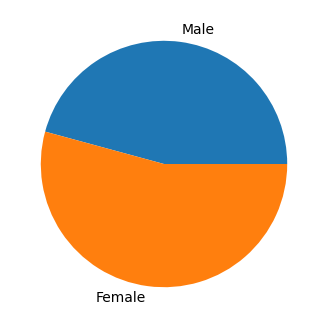

In [22]:
import matplotlib.pyplot as plt

labels = ['Male', 'Female']
sizes = [data.query('Gender == "Male"').Gender.count(), data.query('Gender == "Female"').Gender.count()]

plt.figure(figsize=(4, 4))  # the size of the plot
plt.pie(sizes, labels=labels)
plt.show()

In [23]:
data['Like'] = data['Like'].replace({'I hate it!-5': '-4', 'I love it!+5': '+4'})


In [24]:
data.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [25]:
from sklearn.preprocessing import LabelEncoder

def perform_label_encoding(column):
    encoded_values = LabelEncoder().fit_transform(column)
    return encoded_values

data_columns = data.columns[0:11]
encoded_data = data.copy()

for col in data_columns:
    encoded_data[col] = perform_label_encoding(encoded_data[col])

# Resulting DataFrame with label-encoded values
encoded_data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-4,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [26]:
data_eleven = data.loc[:, data_columns]
data_eleven.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [27]:
round(data_eleven.mean(),2)

<ipython-input-27-85b1c3093fad>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(data_eleven.mean(),2)


Series([], dtype: float64)

In [28]:
MD_x=data_eleven.values
MD_x

array([['No', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
       ['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
       ['No', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'No'],
       ...,
       ['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
       ['Yes', 'Yes', 'No', ..., 'No', 'Yes', 'No'],
       ['No', 'Yes', 'No', ..., 'Yes', 'No', 'Yes']], dtype=object)

In [29]:
from sklearn.preprocessing import LabelEncoder

def perform_label_encoding(column):
    encoded_values = LabelEncoder().fit_transform(column)
    return encoded_values

categories = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for category in categories:
    data[category] = perform_label_encoding(data[category])

data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-4,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


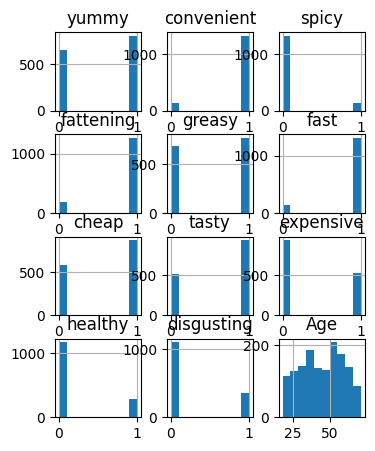

In [30]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (4, 5)

data.hist()  # Plotting histogram for the DataFrame 'data'

plt.show()  # Displaying the plot

In [31]:
data1 = data.loc[:, categories]
data1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [32]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import pandas as pd

# Perform one-hot encoding on categorical columns
encoded_data = pd.get_dummies(data)

# Scale the encoded data
scaled_data = preprocessing.scale(encoded_data)

# Apply PCA
pca = PCA(n_components=11)
principal_components = pca.fit_transform(scaled_data)
component_names = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11']
principal_df = pd.DataFrame(data=principal_components, columns=component_names)
principal_df


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,1.243253,-1.801959,-1.582711,0.253149,1.189427,1.286559,0.180113,-0.209400,-1.188451,0.264005,-0.303223
1,-0.753067,-1.059271,-1.175738,-1.655196,0.080667,0.600056,-1.996614,-1.501733,0.584377,-0.254666,1.417247
2,0.063356,-0.530000,-1.478588,-0.310223,1.969808,1.249406,-1.004140,0.340801,2.986660,2.880468,-0.622968
3,-0.916529,-1.098053,1.933800,0.046654,-1.401259,1.430852,-0.316421,-0.599235,0.356093,-0.146762,-0.737174
4,-0.190439,0.453475,-1.070629,1.019561,-0.894111,-1.651731,0.007141,-1.696293,0.077292,-0.440455,1.701043
...,...,...,...,...,...,...,...,...,...,...,...
1448,4.108570,1.777857,0.292857,-0.508470,0.533872,0.495471,1.286882,-0.524061,-0.573723,0.132749,0.084439
1449,-2.006347,-0.727971,0.987987,-0.328030,0.492440,0.971213,-1.137997,-3.060581,-1.098726,-0.253741,0.384755
1450,-1.436745,-0.066026,0.036772,-1.967603,2.089913,-1.663639,0.497129,0.852077,-0.861817,-0.359006,-0.156335
1451,-2.385435,1.049165,0.129483,2.885687,0.641309,1.025625,-1.261257,0.052613,-0.162386,0.540517,0.143005


In [33]:
explained_var_ratio = pca.explained_variance_ratio_

explained_var_ratio

array([0.14455385, 0.07563947, 0.06246616, 0.06058583, 0.05326954,
       0.05004055, 0.04491928, 0.0411533 , 0.04016972, 0.03880486,
       0.0382004 ])

In [34]:
import numpy as np

cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)
cumulative_var_ratio

array([0.14455385, 0.22019331, 0.28265947, 0.3432453 , 0.39651484,
       0.44655539, 0.49147467, 0.53262797, 0.57279769, 0.61160255,
       0.64980295])

In [35]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data1)
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC" + str(i) for i in range(1, num_pc+1)]
loadings_df = pd.DataFrame(loadings.T, columns=pc_list)
loadings_df['variable'] = data1.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


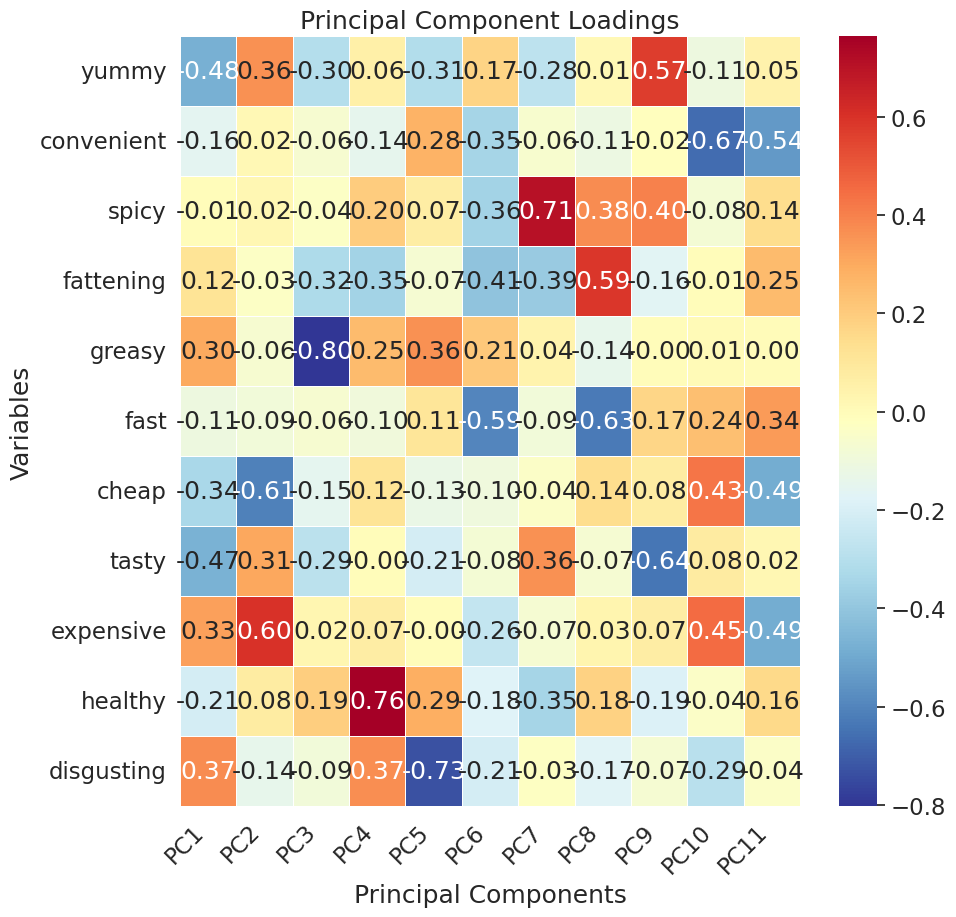

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 10)
sns.set(font_scale=1.5)  # font size

ax = sns.heatmap(loadings_df, annot=True, cmap='RdYlBu_r', fmt='.2f', linewidths=0.5)  # Using custom colormap and number formatting
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotating x-axis labels for better readability

plt.title('Principal Component Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Variables')

plt.show()

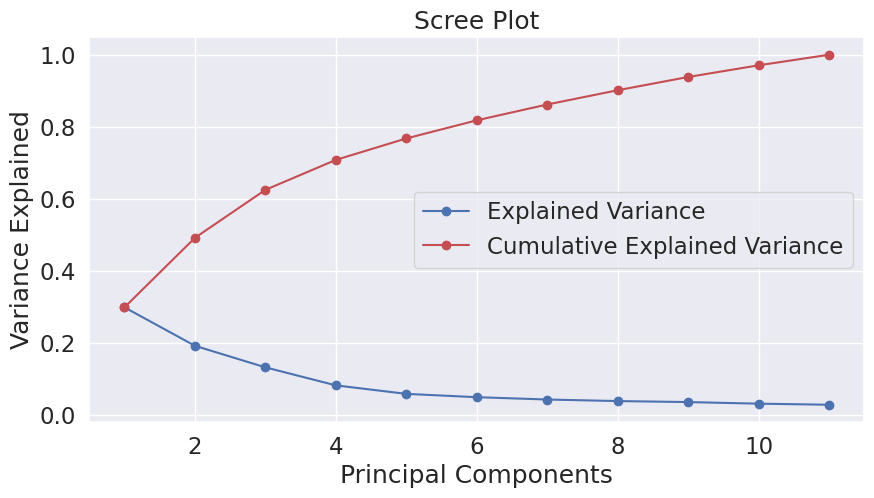

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Compute cumulative explained variance
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# Plot scree plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_pc+1), pca.explained_variance_ratio_, 'bo-', label='Explained Variance')
plt.plot(range(1, num_pc+1), cumulative_var, 'ro-', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.legend()
plt.show()


In [ ]:
!pip install bioinfokit
from bioinfokit.visuz import cluster

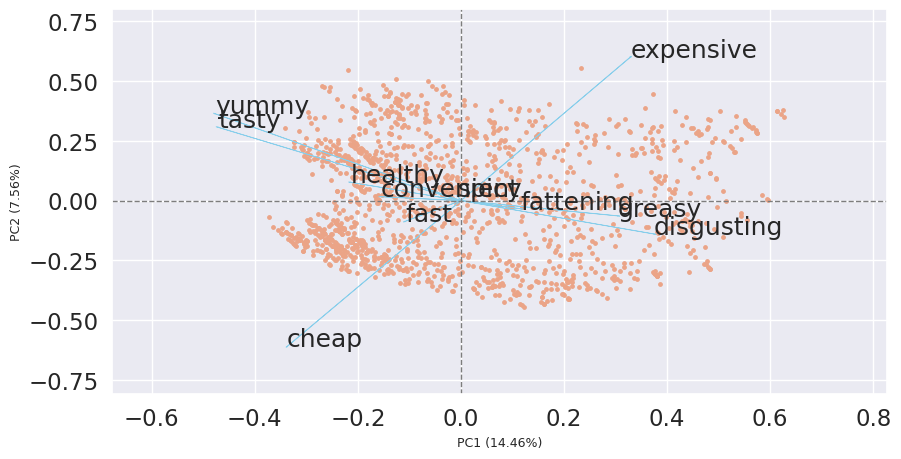

In [43]:
from sklearn.decomposition import PCA
from bioinfokit.visuz import cluster

# Perform PCA on scaled data
pca = PCA()
pca_scores = pca.fit_transform(scaled_data)

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data.columns.values,
               var1=round(explained_variance_ratio[0]*100, 2),
               var2=round(explained_variance_ratio[1]*100, 2),
               show=True, dim=(10, 5))



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

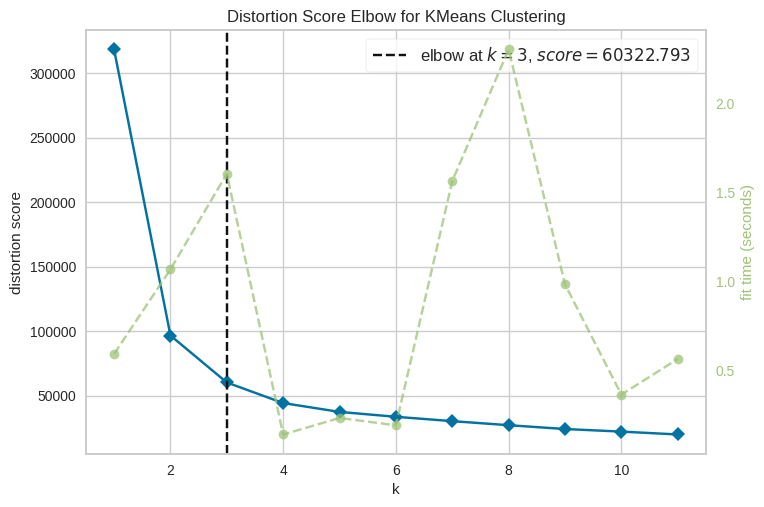

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer

# Create a copy of the data
data_encoded = data.copy()

# Iterate over the categorical columns and apply label encoding
for column in data_encoded.select_dtypes(include=['object']):
    data_encoded[column] = LabelEncoder().fit_transform(data_encoded[column])

# Perform K-means clustering and elbow plot analysis
kmeans_model = KMeans()
elbow_visualizer = KElbowVisualizer(kmeans_model, k=(1, 12)).fit(data_encoded)
elbow_visualizer.show()



In [49]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the data
data_encoded = data.copy()

# Iterate over the categorical columns and apply label encoding
for column in data_encoded.select_dtypes(include=['object']):
    data_encoded[column] = LabelEncoder().fit_transform(data_encoded[column])

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(data_encoded)
data['cluster_num'] = kmeans.labels_
print(kmeans.labels_)
print(kmeans.inertia_)
print(kmeans.n_iter_)
print(kmeans.cluster_centers_)


[2 3 2 ... 3 1 0]
44360.20104717922
10
[[7.70718232e-01 9.36464088e-01 4.69613260e-02 9.33701657e-01
  7.23756906e-01 9.30939227e-01 6.24309392e-01 7.95580110e-01
  3.61878453e-01 1.71270718e-01 2.04419890e-01 4.34806630e+00
  2.57734807e+01 2.69889503e+00 4.75138122e-01]
 [6.06469003e-01 9.11051213e-01 7.00808625e-02 8.73315364e-01
  5.09433962e-01 8.67924528e-01 5.28301887e-01 6.63072776e-01
  4.31266846e-01 2.23719677e-01 2.58760108e-01 4.66037736e+00
  3.88194070e+01 2.73045822e+00 4.74393531e-01]
 [4.08955224e-01 8.71641791e-01 1.70149254e-01 8.14925373e-01
  4.26865672e-01 9.10447761e-01 6.53731343e-01 5.46268657e-01
  2.65671642e-01 2.08955224e-01 2.29850746e-01 4.96119403e+00
  6.29283582e+01 2.58208955e+00 4.53731343e-01]
 [4.20779221e-01 9.09090909e-01 9.35064935e-02 8.44155844e-01
  4.44155844e-01 8.93506494e-01 5.94805195e-01 5.68831169e-01
  3.63636364e-01 1.92207792e-01 2.75324675e-01 4.60259740e+00
  5.19428571e+01 2.54025974e+00 4.28571429e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 335, 3: 385, 0: 362, 1: 371})

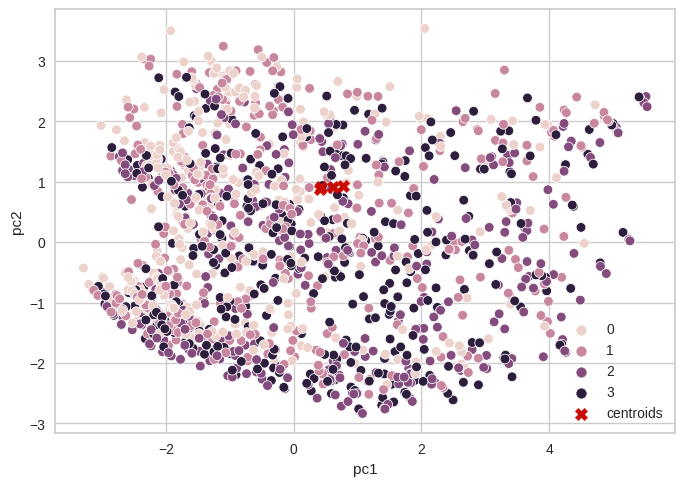

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of PC1 vs PC2 with cluster labels
sns.scatterplot(data=principal_df, x="pc1", y="pc2",  hue=kmeans.labels_)

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="X",c="r",s=80,label="centroids")

# Add legend
plt.legend()

# Show the plot
plt.show()










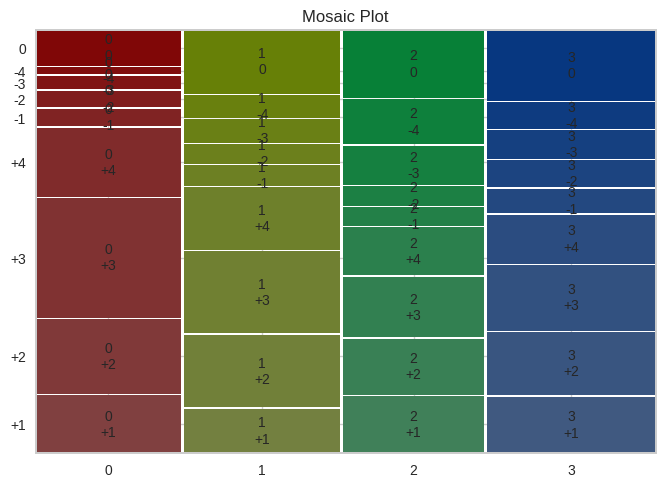

In [60]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

crosstab = pd.crosstab(data['cluster_num'], data['Like'])

# Reordering columns
columns_to_include = crosstab.columns.intersection(['-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4'])
crosstab = crosstab[columns_to_include]

# Create mosaic plot
mosaic(crosstab.stack(), title='Mosaic Plot')

# Show the plot
plt.show()


In [61]:
crosstab_gender =pd.crosstab(data['cluster_num'],data['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,190,172
1,195,176
2,183,152
3,220,165


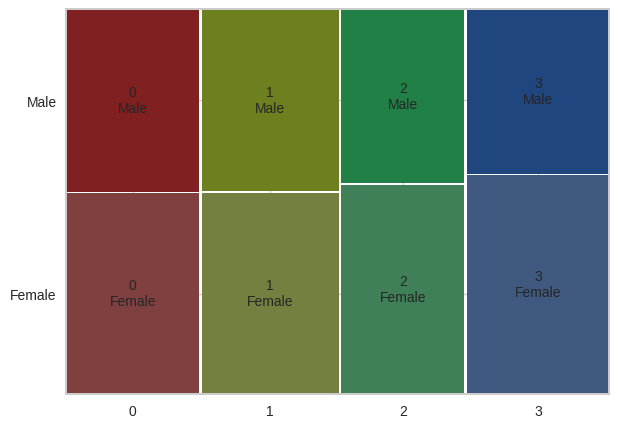

In [62]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

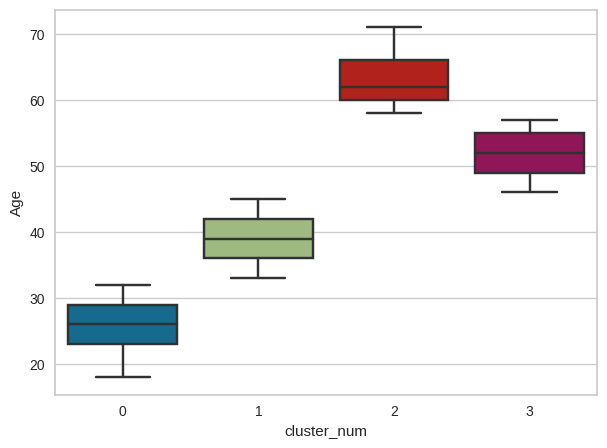

In [64]:
sns.boxplot(x="cluster_num", y="Age",data=data)

In [73]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'VisitFrequency' column
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])

# Calculate the mean visit frequency for each cluster
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()

visit

,cluster_num,VisitFrequency
0,0,2.698895
1,1,2.730458
2,2,2.582090
3,3,2.540260


In [72]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Like' column
data['Like'] = LabelEncoder().fit_transform(data['Like'])

# Calculate the mean value for 'Like' column for each cluster
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()


Like

,cluster_num,Like
0,0,4.348066
1,1,4.660377
2,2,4.961194
3,3,4.602597


In [74]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Gender' column
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# Calculate the mean value for 'Gender' column for each cluster
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()

Gender

,cluster_num,Gender
0,0,0.475138
1,1,0.474394
2,2,0.453731
3,3,0.428571


In [75]:
# Merge Gender, Like, and visit DataFrames
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.475138,4.348066,2.698895
1,1,0.474394,4.660377,2.730458
2,2,0.453731,4.961194,2.582090
3,3,0.428571,4.602597,2.540260


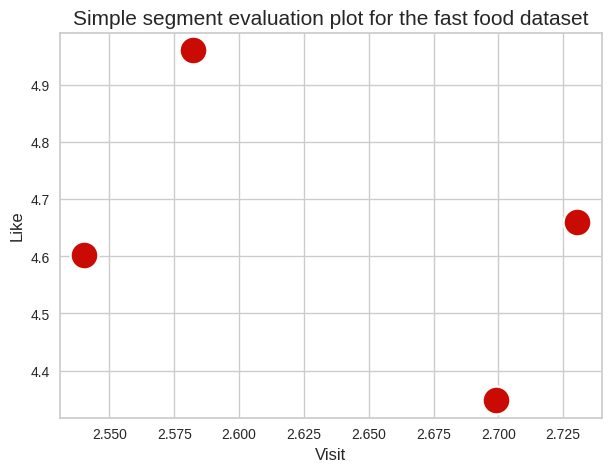

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(7, 5))

# Create a scatter plot
sns.scatterplot(x="VisitFrequency", y="Like", data=segment, s=400, color="r")

# Set the title and axis labels
plt.title("Simple segment evaluation plot for the fast food dataset", fontsize=15)
plt.xlabel("Visit", fontsize=12)
plt.ylabel("Like", fontsize=12)

# Display the plot
plt.show()


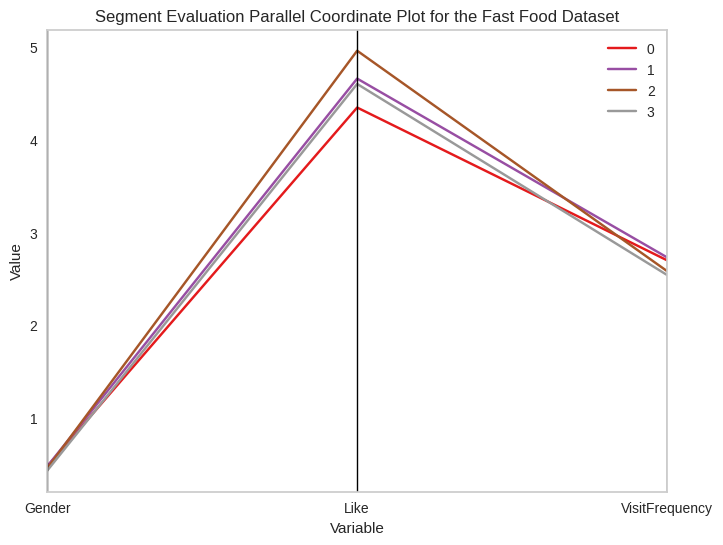

In [81]:
from pandas.plotting import parallel_coordinates

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the parallel coordinates plot
parallel_coordinates(segment, 'cluster_num', colormap='Set1')

# Set the x and y axis labels
plt.xlabel('Variable')
plt.ylabel('Value')

# Set the title of the plot
plt.title('Segment Evaluation Parallel Coordinate Plot for the Fast Food Dataset')

# Display the plot
plt.show()
